# Engineering Metrics Example

In order to authenticate with the current Jira server we are required to use oauth with karhoo google apps credentials. To set this up you require the private and public keys of the Jira application for engineering metrics. Once you have these, set up your access as outlined here. 

Once config files are in place we can simple pass the path to the oauth config to an instance of the Engineering Metrics engine to gain access to all the juicy data stored in our Jira.

In [1]:
import sys
sys.path.append("..")
from engineeringmetrics.engine import EngineeringMetrics
from pathlib import Path

config_dict = {
    'jira_oauth_config_path': Path.home()
}

kem = EngineeringMetrics(config_dict)
projects_data = kem.jirametrics.populate_projects(['INT'],  max_results=110)


Reading OAuth from /home/russell/.oauthconfig/.oauth_jira_config
Request data for project id INT
Data received for project id INT
Request issues for project id INT


Issues received for project id INT


In [2]:
import pandas as pd
df = pd.DataFrame(projects_data['INT'].issues)
df.shape

(110, 16)

In [3]:
df.head()

,ttype,id,key,url,summary,labels,created,updated_at,resolution,resolutiondate,assignee,description,priority,status,fixVersion,cycle_time
0,Task,27837,INT-219,https://jira.flit.tech/browse/INT-219,Support Dynamic Fleet Accounts for Cabguru fleets,[Cabguru],2019-08-08 15:32:33+01:00,None,None,None,Volha Dziaruha,The Booking.Go pilot Airport Community require...,Blocker,In QA,None,-1
1,Bug,27710,INT-214,https://jira.flit.tech/browse/INT-214,Very Urgent Not possible to see SnapCar for a ...,"[Integration-issue, production-support]",2019-08-06 13:27:42+01:00,None,Done,2019-08-07 16:22:06+01:00,Chris Walker,"We don't have a lot of trips with SnapCar, aft...",Blocker,Done,16 Aug 2019,1
2,Bug,30633,INT-362,https://jira.flit.tech/browse/INT-362,Possible Issue With LeCab Bookings on Gare Con...,"[LeCab, operations-support, production-support]",2019-10-10 11:20:37+01:00,None,Done,2019-10-14 08:15:05+01:00,Chris Walker,In the last 20 hours there have been 12 FAILED...,Blocker,Done,None,2
3,Bug,29182,INT-277,https://jira.flit.tech/browse/INT-277,received non-200 response from DMS: could not ...,[],2019-09-12 13:07:51+01:00,None,Done,2019-09-16 10:39:22+01:00,Andrei Stsishanok,Looks like it could be a permissions issue? Se...,Highest,Done,Release 13 Sep 2019,2
4,Bug,29142,INT-297,https://jira.flit.tech/browse/INT-297,Wrong pick-up time and no status update on the...,[operations-support],2019-09-11 16:34:32+01:00,None,Done,2019-10-08 14:43:18+01:00,Preveen Etienne,DMS : German Transfer\r\n\r\nFleet : German Tr...,Highest,Done,None,19


In [4]:
oso_query = kem.jirametrics.populate_from_jql('project = "OSO" ORDER BY Rank ASC')
oso_df = pd.DataFrame(oso_query.resolved_issues())
oso_df.shape

(8, 16)

In [5]:
oso_df.head()

,ttype,id,key,url,summary,labels,created,updated_at,resolution,resolutiondate,assignee,description,priority,status,fixVersion,cycle_time
0,Task,29027,OSO-14,https://jira.flit.tech/browse/OSO-14,Radio Taxi Sevilla,[Taxitronic],2019-09-10 14:02:00+01:00,None,Done,2019-09-11 16:55:00+01:00,Carmen Turner,Taxitronic,Normal,Done,None,1
1,Task,29397,OSO-38,https://jira.flit.tech/browse/OSO-38,Werotax,[],2019-09-17 16:42:31+01:00,None,Done,2019-10-18 10:41:37+01:00,None,Sint-Oedenrode,Normal,Done,None,23
2,Task,29550,OSO-40,https://jira.flit.tech/browse/OSO-40,Britannia Taxis,"[Booking.com, iCabbi]",2019-09-20 10:17:35+01:00,None,Done,2019-09-20 16:05:52+01:00,James Wilkins,Liverpool,Normal,Done,None,0
3,Task,29552,OSO-41,https://jira.flit.tech/browse/OSO-41,Thistle Cabs,[iCabbi],2019-09-20 10:19:58+01:00,None,Done,2019-09-20 16:05:48+01:00,James Wilkins,Kilmarnock,Normal,Done,None,0
4,Task,29554,OSO-42,https://jira.flit.tech/browse/OSO-42,Door 2 Door Cars,"[Booking.com, iCabbi]",2019-09-20 10:21:11+01:00,None,Done,2019-10-08 17:34:18+01:00,James Wilkins,Southampton,Normal,Done,None,12


Text(0.5, 1.0, 'Time between creation and resolution of OSO issues')

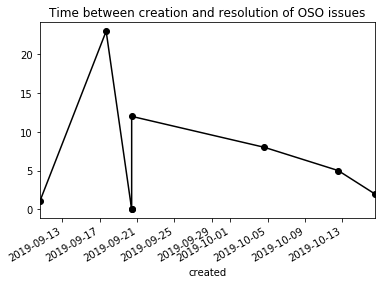

In [9]:
oso_df.set_index('created',drop=False,inplace=True)
oso_df.cycle_time.plot(kind='line',style='ko-').set_title('Time between creation and resolution of OSO issues')

In [7]:
closed_df = pd.DataFrame(projects_data['INT'].resolved_issues())
closed_df.shape

(89, 16)

Text(0.5, 1.0, 'Time between creation and resolution of INT issues')

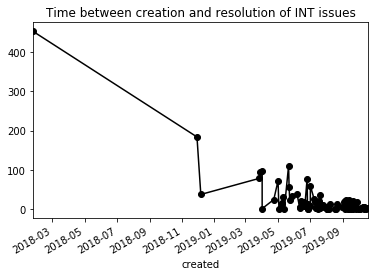

In [8]:
closed_df.set_index('created',drop=False,inplace=True)
closed_df.cycle_time.plot(kind='line',style='ko-').set_title('Time between creation and resolution of INT issues')